<a href="https://colab.research.google.com/github/sowmya-17u/loan-prediction-project/blob/main/sowmya-17u/loan-prediction-projectloanprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
test=pd.read_csv('/content/loanpredictionTN.csv')
train=pd.read_csv('/content/loanpredictionZ9i.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
train.shape

(614, 13)

In [ ]:
train.drop(['Loan_ID'], axis =1, inplace=True)

In [ ]:
missing_percentage = train.isnull().mean() * 100
print(missing_percentage)

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


In [ ]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
train.dtypes

,0
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


In [ ]:
numerical_col = [col for col in train.columns if train[col].dtype != 'object' ]
numerical_col

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [ ]:
categorical_col = [col for col in train.columns if train[col].dtype == 'object']
categorical_col

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [ ]:
#Filling the Empty values
numericalImputer = SimpleImputer(strategy='mean')
categoricalImputer = SimpleImputer(strategy='most_frequent')

train[numerical_col] = numericalImputer.fit_transform(train[numerical_col])
train[categorical_col] = categoricalImputer.fit_transform(train[categorical_col])
le=LabelEncoder()
for col in categorical_col:
    train[col]=le.fit_transform(train[col])
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583.0,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000.0,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583.0,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000.0,0.0,141.000000,360.0,1.0,2,1


In [ ]:
categorical_col.remove('Loan_Status')

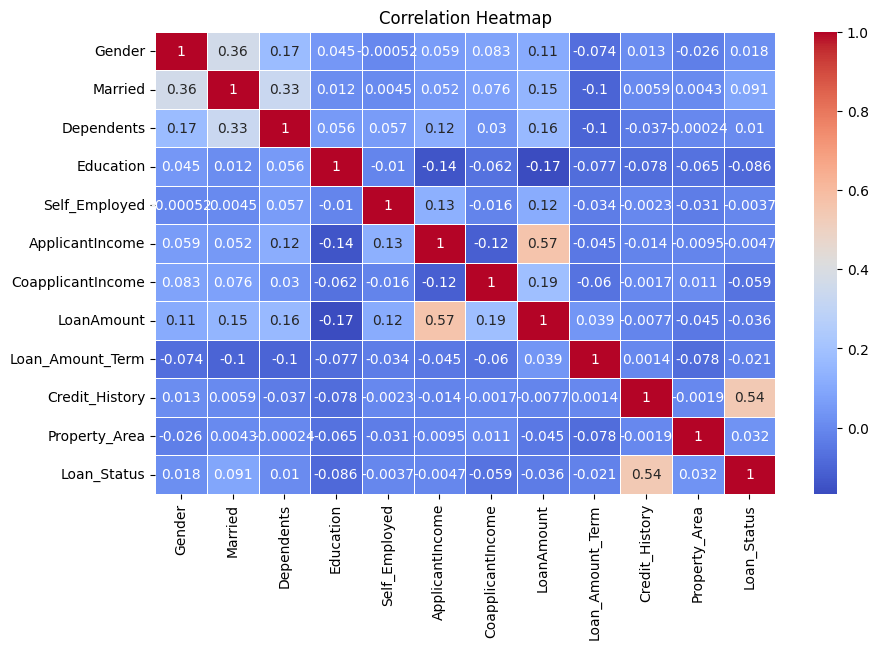

In [ ]:
plt.figure(figsize=(10,6))
sn.heatmap(train.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

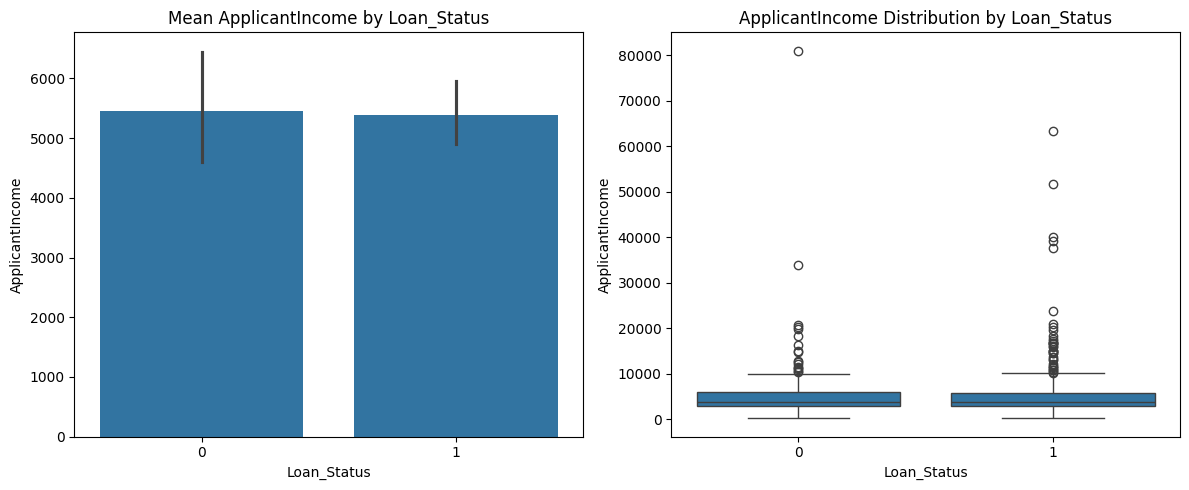

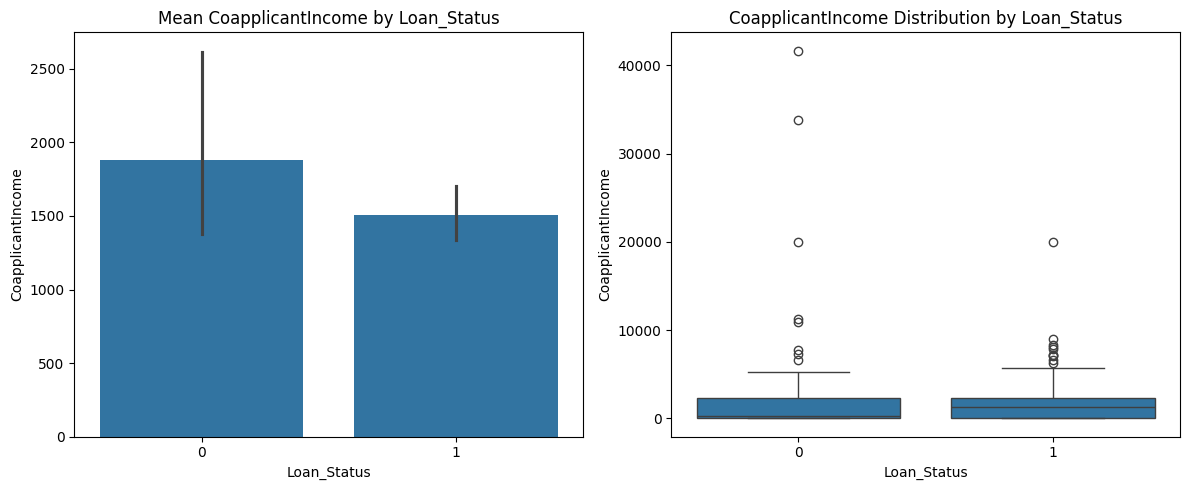

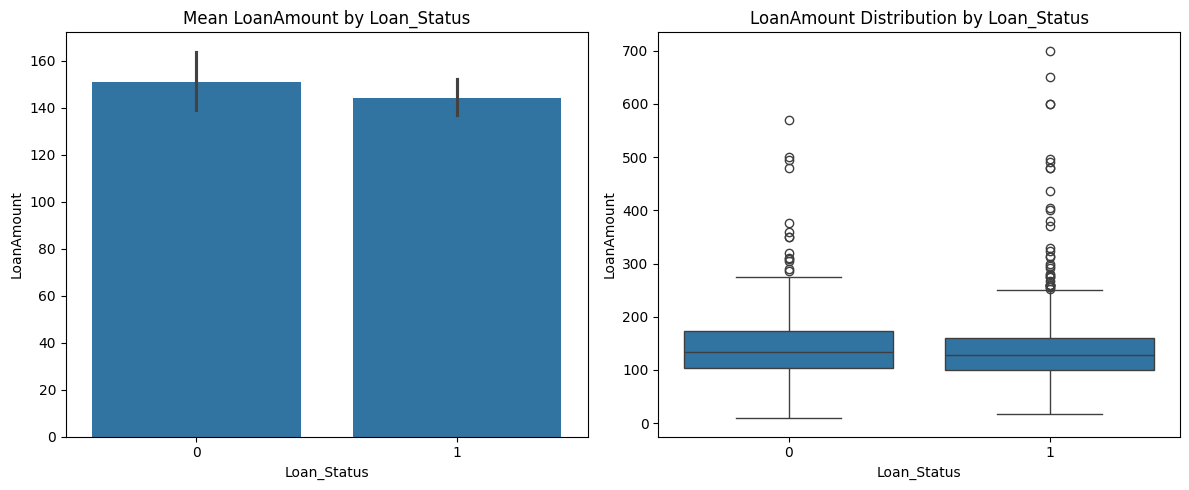

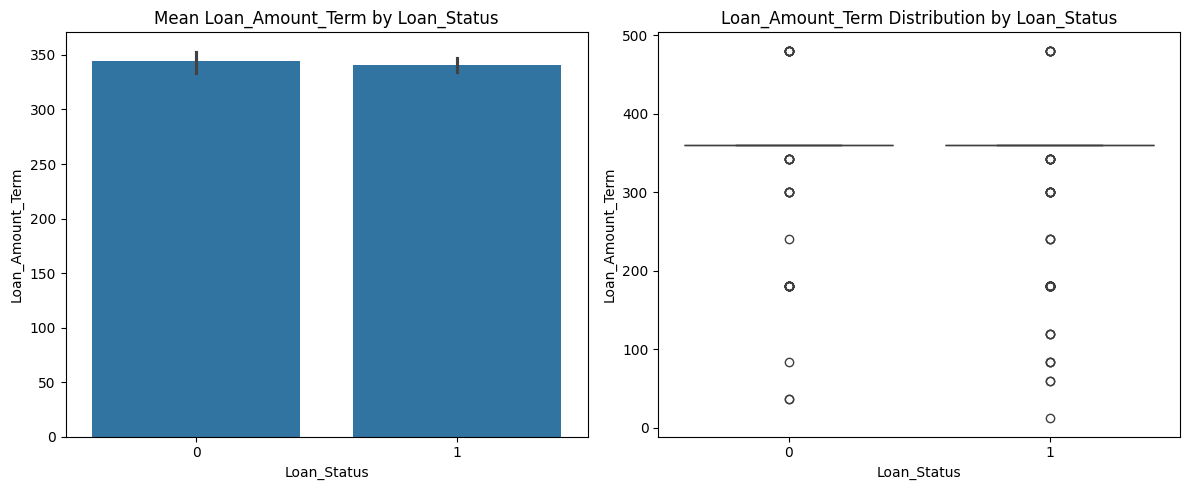

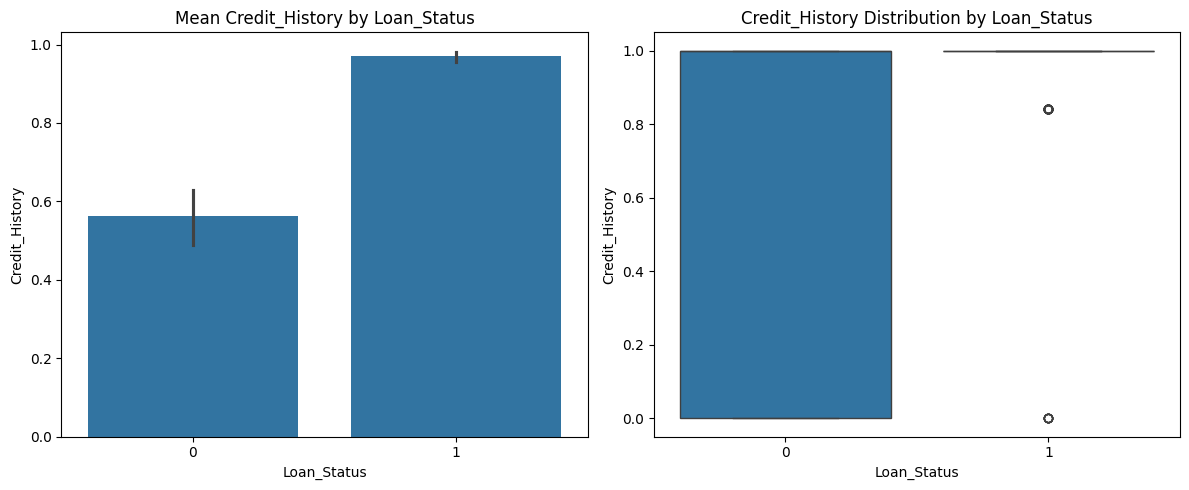

In [ ]:
for i, col in enumerate(numerical_col, 1):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sn.barplot(data=train, x='Loan_Status', y=col)
    plt.title(f'Mean {col} by Loan_Status')

    plt.subplot(1, 2, 2)
    sn.boxplot(data=train, x='Loan_Status', y=col)
    plt.title(f'{col} Distribution by Loan_Status')

    plt.tight_layout()
    plt.show()

In [ ]:
scaler = StandardScaler()

train[numerical_col] = scaler.fit_transform(train[numerical_col])

In [ ]:
X = train.iloc[:, :-1]
y = train.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2)

In [ ]:
pipeline = Pipeline([
    ('logreg', LogisticRegression())
])

param_grid = [
    {
        'logreg__penalty': ['l1'],
        'logreg__C': [0.01, 0.1, 1, 10],
        'logreg__solver': ['liblinear'],
        'logreg__max_iter': [100, 500, 1000]
    },
    {
        'logreg__penalty': ['l2'],
        'logreg__C': [0.01, 0.1, 1, 10],
        'logreg__solver': ['lbfgs', 'sag', 'liblinear', 'newton-cg'],
        'logreg__max_iter': [100, 500, 1000]
    },
    {
        'logreg__penalty': ['elasticnet'],
        'logreg__C': [0.01, 0.1, 1, 10],
        'logreg__solver': ['saga'],
        'logreg__l1_ratio': [0.0, 0.5, 1.0],
        'logreg__max_iter': [100, 500, 1000]
    }
]

grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)

print("\nBest Hyperparameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

y_pred = grid_search.predict(X_test)


test_accuracy = grid_search.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)
from sklearn.metrics import accuracy_score,classification_report
print("Accuracy of the model:", accuracy_score(y_test, y_pred))


print("Classification report")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 96 candidates, totalling 480 fits

Best Hyperparameters: {'logreg__C': 1, 'logreg__max_iter': 100, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
Best CV Accuracy: 0.8207792207792208
Test Set Accuracy: 0.7642276422764228
Accuracy of the model: 0.7642276422764228
Classification report
              precision    recall  f1-score   support

           0       0.81      0.33      0.47        39
           1       0.76      0.96      0.85        84

    accuracy                           0.76       123
   macro avg       0.78      0.65      0.66       123
weighted avg       0.77      0.76      0.73       123



In [ ]:
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced']
}

tree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=tree,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)

best_tree = grid_search.best_estimator_

y_pred = best_tree.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy of the best model:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy of the best model: 0.7560975609756098

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.33      0.46        39
           1       0.75      0.95      0.84        84

    accuracy                           0.76       123
   macro avg       0.76      0.64      0.65       123
weighted avg       0.76      0.76      0.72       123

